# Observable Trends
----
- As the latitude increases, the temperature is lower - which makes sense, since latitude judges by how close you are to the equator. The further away, the colder it becomes.
- I would make the same point as above for the City latitude vs. Humidity figure. The cloudiness plot vs latitude looks like it's around the same cloudiness no matter which point you are - I would rather compare cloudiness to humidity.
- Most cities dont have winds above 20mph. Above 20mph+ are scattered but the fastest is -40 - -50 latitude.


In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:
# my OWM api key
api_key = api_key

# start url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# create lists to append the data to
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# print
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        print(f"Processing Record {record} | {city_record}")
        print(f"{city}")
        
        # Increase counter by one 
        record= record + 1

        
    # skip if you cant find the city
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hermanus
hermanus
Processing Record 2 | Tual
tual
Processing Record 3 | Albany
albany
City not found. Skipping...
Processing Record 4 | Kahului
kahului
City not found. Skipping...
Processing Record 5 | Funadhoo
funadhoo
Processing Record 6 | Springbok
springbok
Processing Record 7 | Thompson
thompson
Processing Record 8 | Avarua
avarua
Processing Record 9 | Bonavista
bonavista
Processing Record 10 | Yatou
yatou
City not found. Skipping...
Processing Record 11 | Faanui
faanui
Processing Record 12 | Westport
westport
Processing Record 13 | Lebu
lebu
Processing Record 14 | Mataura
mataura
Processing Record 15 | Arlit
arlit
Processing Record 16 | Prado
prado
Processing Record 17 | Sitka
sitka
Processing Record 18 | Ushuaia
ushuaia
City not found. Skipping...
Processing Record 19 | Puerto Ayora
puerto ayora
Processing Record 20 | Borujerd
borujerd
Processing Record 21 | Vila Franca do Campo
vila franca do campo
P

Processing Record 181 | Chivay
chivay
Processing Record 182 | Valdivia
valdivia
Processing Record 183 | Puga
puga
Processing Record 184 | Haines Junction
haines junction
Processing Record 185 | Baykit
baykit
Processing Record 186 | Akureyri
akureyri
Processing Record 187 | Aswan
aswan
Processing Record 188 | Garden City
garden city
City not found. Skipping...
Processing Record 189 | Hakkari
hakkari
Processing Record 190 | Neiafu
neiafu
Processing Record 191 | Nantucket
nantucket
Processing Record 192 | Olinda
olinda
Processing Record 193 | Herat
herat
Processing Record 194 | Juruti
juruti
Processing Record 195 | Progreso
progreso
Processing Record 196 | Torbay
torbay
Processing Record 197 | Souillac
souillac
Processing Record 198 | College
college
Processing Record 199 | Hendek
hendek
Processing Record 200 | Muros
muros
City not found. Skipping...
Processing Record 201 | Vostok
vostok
Processing Record 202 | Bone
bone
Processing Record 203 | Shimoda
shimoda
Processing Record 204 | Kira

City not found. Skipping...
Processing Record 363 | Ancud
ancud
City not found. Skipping...
Processing Record 364 | Pueblo Nuevo
pueblo nuevo
Processing Record 365 | Marathon
marathon
Processing Record 366 | Margate
margate
Processing Record 367 | North Bend
north bend
Processing Record 368 | Mareeba
mareeba
Processing Record 369 | Skibbereen
skibbereen
Processing Record 370 | Kargil
kargil
Processing Record 371 | East Liverpool
east liverpool
Processing Record 372 | Abu Dhabi
abu dhabi
Processing Record 373 | Salvador
salvador
Processing Record 374 | Pontes e Lacerda
pontes e lacerda
City not found. Skipping...
Processing Record 375 | Alta Floresta
alta floresta
Processing Record 376 | Vanimo
vanimo
Processing Record 377 | Oranjemund
oranjemund
City not found. Skipping...
Processing Record 378 | Mhlambanyatsi
mhlambanyatsi
Processing Record 379 | Wheatley
wheatley
Processing Record 380 | Springdale
springdale
Processing Record 381 | Mitsamiouli
mitsamiouli
Processing Record 382 | Wein

Processing Record 542 | Adrar
adrar
Processing Record 543 | Ponta Delgada
ponta delgada
City not found. Skipping...
Processing Record 544 | Minsk
minsk
Processing Record 545 | Port Moresby
port moresby
Processing Record 546 | The Valley
the valley
City not found. Skipping...
Processing Record 547 | Valle Nacional
valle nacional
Processing Record 548 | Rio Grande
rio grande
Processing Record 549 | Morant Bay
morant bay
Processing Record 550 | Kabalo
kabalo
City not found. Skipping...
Processing Record 551 | Chhaprauli
chhaprauli
Processing Record 552 | Soyo
soyo
City not found. Skipping...
Processing Record 553 | Praia da Vitoria
praia da vitoria
City not found. Skipping...
Processing Record 554 | Vila
vila
Processing Record 555 | Palmer
palmer
Processing Record 556 | Sabzevar
sabzevar
Processing Record 557 | Mujiayingzi
mujiayingzi
Processing Record 558 | Selizharovo
selizharovo
City not found. Skipping...
Processing Record 559 | Saint-Pierre
saint-pierre
Processing Record 560 | Giddal

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from the dictionary you created above
weather_data = pd.DataFrame(weatherpy_dict)

# Display the count
weather_data.count()

City          574
Cloudiness    574
Country       574
Date          574
Humidity      574
Lat           574
Lng           574
Max Temp      574
Wind Speed    574
dtype: int64

In [15]:
# export the data into a .CSV
weather_data.to_csv('weather_data.csv')

# Display data frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,100,ZA,1566829557,72,-34.42,19.24,57.00,7.00
1,Tual,100,ID,1566829558,82,-5.67,132.75,77.28,17.72
2,Albany,1,US,1566829299,63,42.65,-73.75,68.00,4.70
3,Kahului,90,US,1566829560,83,20.89,-156.47,77.00,12.75
4,Funadhoo,100,MV,1566829562,76,6.15,73.27,82.86,8.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

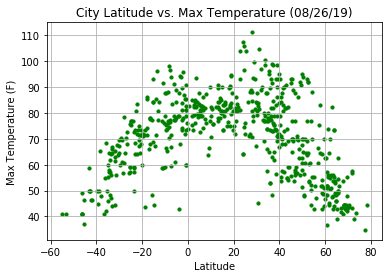

In [56]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10, color="green", edgecolor = "green")

plt.title("City Latitude vs. Max Temperature (08/26/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure into a .png
plt.savefig("latitude_and_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

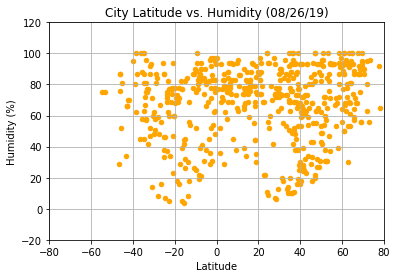

In [57]:
weather_data.plot(kind="scatter",x="Lat",y="Humidity",
                    grid=True, color="orange", edgecolor = "orange")
plt.title('City Latitude vs. Humidity (08/26/19)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)

#SAVE .png
plt.savefig('humidityPlot')
plt.show()

#### Latitude vs. Cloudiness Plot

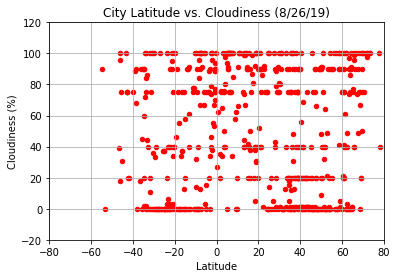

In [58]:
weather_data.plot(kind="scatter",x="Lat",y="Cloudiness",
                    grid=True, color="red", edgecolor = "red")

plt.title('City Latitude vs. Cloudiness (8/26/19)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)

#save
plt.savefig('cloudinessPlot')
plt.show()

#### Latitude vs. Wind Speed Plot

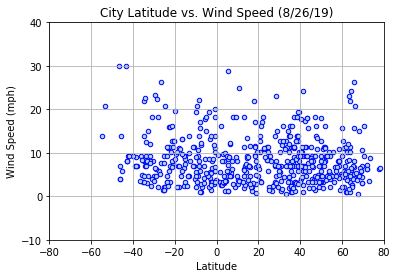

In [59]:
weather_data.plot(kind="scatter",x="Lat",y="Wind Speed",
                    grid=True, color="lightblue", edgecolor = "blue")

plt.title('City Latitude vs. Wind Speed (8/26/19)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-10, 40)

#save
plt.savefig('windspeed')
plt.show()